In [20]:
import tensorflow as tf
tf.__version__

'2.9.1'

In [1]:
import numpy as np
import pandas as pd
import time
import h5pyd
import geopandas as gpd
from dw_tap.data_fetching import getData
from dw_tap.power_output import estimate_power_output
from dw_tap.lom import run_lom

z_turbine = 40 # turbine height in [m]
lat, lon = 39.32856, -89.40238
obstacle_file = "../sites/180-Manual1.geojson"

t_start = time.time()

#Read in data from CSV file instead of hsds + getData
atmospheric_df = pd.read_csv("../data/180_1year_12hourgranularity.csv")
# Temporary (later need to resave csv without index column) 
if "Unnamed: 0" in atmospheric_df.columns:
    atmospheric_df.drop(columns=["Unnamed: 0"], inplace=True)

obstacles_df = gpd.read_file(obstacle_file)
# Leave in only relevant columns
obstacles_df = obstacles_df[["height", "geometry"]]

x1_turbine, y1_turbine = lat, lon
xy_turbine = [np.array([x1_turbine, y1_turbine])]

t_lom_start = time.time()
predictions_df = \
    run_lom(atmospheric_df, obstacles_df, xy_turbine, z_turbine)
t_lom = time.time() - t_lom_start
print('Running LOM: %.2f (s)' % t_lom)

t_power_start = time.time()
kw, above_curve, below_curve, above_curve_list, below_curve_list = \
    estimate_power_output(predictions_df, atmospheric_df["temp"], atmospheric_df["pres"])  
t_power = time.time() - t_power_start
print('Power estimation: %.2f (s)' % t_power)

t_total = time.time()-t_start
print('Total time: %.2f (s)' % t_total)

/Users/dduplyak/anaconda3/envs/dw-tap/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


run_lom: starting
run_lom: loaded model
run_lom: after geojson_toCoordinate
run_lom: after prepare_data
time to fill arrays : 0.0032792091369628906  sec
input_data: [[ 1.00000000e+00  2.51383921e+00  2.73118657e+00  5.84770419e+04
   1.59803992e+04  4.00000000e+00]
 [ 1.00000000e+00  2.06790207e+00  2.41179362e+00  5.23100896e+04
  -3.06364508e+04  4.00000000e+00]
 [ 1.00000000e+00  2.47685352e+00  2.62784171e+00  4.20210680e+04
  -4.36940206e+04  4.00000000e+00]
 ...
 [ 1.00000000e+00  2.47237233e+00  2.16689816e+00  3.35752463e+04
   5.04741560e+04  4.00000000e+00]
 [ 1.00000000e+00  2.58682170e+00  2.73435426e+00  5.66653479e+04
   2.15401007e+04  4.00000000e+00]
 [ 1.00000000e+00  2.63122187e+00  2.66304388e+00  3.44716717e+04
  -4.98662354e+04  4.00000000e+00]]
checkpoint_dir: /Users/dduplyak/anaconda3/envs/dw-tap/lib/python3.8/site-packages/dw_tap-0.0.0-py3.8.egg/dw_tap/anl-lom-models/checkpoints/my_checkpoint.index
Instructions for updating:
Restoring a name-based tf.train.Saver

2022-12-19 15:54:21.287299: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


outputs_0 [[ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 1.19209275e-07]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-2.98023252e-07]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 8.34464743e-07]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 1.90734681e-06]
 [ 0.00000000e+00]
 [ 1.19209275e-07]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 1.59739175e-05]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [

/Users/dduplyak/anaconda3/envs/dw-tap/lib/python3.8/site-packages/dw_tap-0.0.0-py3.8.egg/dw_tap/LOMvectorized.py:294: RuntimeWarning: divide by zero encountered in log
  predictions = np.log(predictions)


In [3]:
predictions_df

,timestamp,ws-adjusted,ws,nonlinear
0,2007-01-01 00:00:00,7.744876,7.744876,7.722517
1,2007-01-01 12:00:00,9.165510,9.165510,9.272512
2,2007-01-02 00:00:00,5.667914,5.667914,5.731424
3,2007-01-02 12:00:00,1.196242,1.196242,1.216455
4,2007-01-03 00:00:00,6.783602,6.783602,6.855955
...,...,...,...,...
726,2007-12-30 00:00:00,3.874950,3.874950,3.926365
727,2007-12-30 12:00:00,4.888072,4.888072,4.953222
728,2007-12-31 00:00:00,6.975717,6.975717,7.024402
729,2007-12-31 12:00:00,4.802318,4.802318,4.864532


<AxesSubplot:>

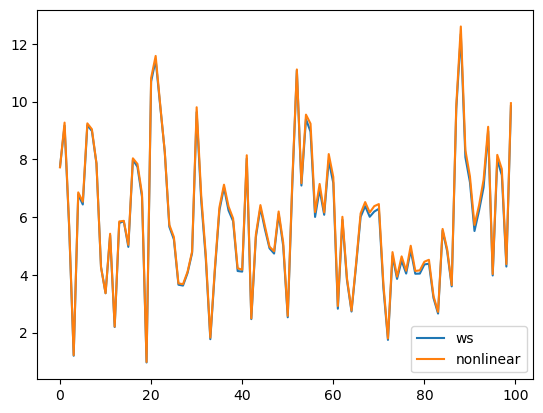

In [22]:
predictions_df[["ws", "nonlinear"]][:100].plot()

In [23]:
predictions_df[predictions_df["nonlinear"] < 0]

,timestamp,ws-adjusted,ws,nonlinear
420,2007-07-30 00:00:00,-79.890079,4.406818,-78.056278
423,2007-07-31 12:00:00,-inf,4.581054,-inf


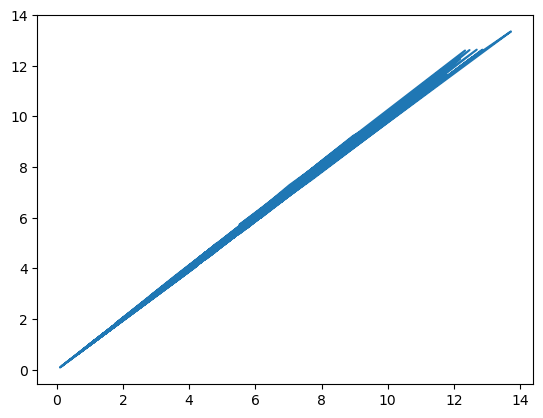

In [7]:
tmp = predictions_df[predictions_df["nonlinear"] > 0]

import matplotlib.pyplot as plt
plt.plot(tmp["ws"], tmp["nonlinear"])

In [8]:
tmp["ws"].max()

13.72442114431899

In [15]:
predictions_df["nonlinear"].max()

13.353282925454957

In [16]:
predictions_df["nonlinear"][:5]

0    7.722517
1    9.272512
2    5.731424
3    1.216455
4    6.855955
Name: nonlinear, dtype: float64

In [19]:
predictions_df["ws-adjusted"][:5]

0    7.744876
1    9.165510
2    5.667914
3    1.196242
4    6.783602
Name: ws-adjusted, dtype: float64

In [17]:
len(predictions_df["nonlinear"])

731

In [15]:
##### Cells below can be used for demonstration purposes

In [9]:
# atmospheric_df

In [10]:
# obstacles_df #height is in meters; geometry has polygons in (lat,lon) pairs

In [11]:
# xy_turbine # location of turbine in lat,lon

In [12]:
# z_turbine # hub height in meters 

In [14]:
# predictions_df = \
#     run_lom(atmospheric_df, obstacles_df, xy_turbine, z_turbine)

In [13]:
# predictions_df